# IntelliRefinder
#### Using machine learning to identify the mortgage refinance opportunity for mortgage lenders

Meng Chen, PhD                                                                                         
Data Science Fellow at Insight Data Science                                              
[LinkedIn](https://www.linkedin.com/in/mlchen/); [GitHub](https://github.com/biomchen)

#### This notebook is for preprocessing the American Community Survey data

In [2]:
from refinder import *
import modin.pandas as mpd
from pathlib import Path
import matplotlib.pyplot as plt

#### Load the csv files

In [3]:
king_folder = '../data/acs/wa/king'
king_path = Path(king_folder)
king_csvs = list(king_path.glob('*.{}'.format('csv')))

#### Inspect the coloums 

In [4]:
def csv_inspect(folder, header=1):
    path = Path(folder)
    files = list(path.glob('*.{}'.format('csv')))
    for file in files:
        df = pd.read_csv(file, header=header)
        df = df.drop([0])
        print(df.columns)
        
csv_inspect('../data/acs/wa/king')

Index(['Id', 'Id2', 'Geography',
       'Total; Estimate; Population 16 years and over',
       'Total; Margin of Error; Population 16 years and over',
       'Labor Force Participation Rate; Estimate; Population 16 years and over',
       'Labor Force Participation Rate; Margin of Error; Population 16 years and over',
       'Employment/Population Ratio; Estimate; Population 16 years and over',
       'Employment/Population Ratio; Margin of Error; Population 16 years and over',
       'Unemployment rate; Estimate; Population 16 years and over',
       ...
       'Unemployment rate; Estimate; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Some college or associate's degree',
       'Unemployment rate; Margin of Error; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Some college or associate's degree',
       'Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher',
       'Total; Margin of Error; EDUCATIONAL ATTAINMENT - Population 

In [5]:
headers = ['Labor Force Participation Rate; Estimate; Population 16 years and over',
           'Employment/Population Ratio; Estimate; Population 16 years and over',
           'Unemployment rate; Estimate; Population 16 years and over',
           'Estimate; Total: - Less than 5 minutes',
           'Estimate; Total: - 5 to 9 minutes',
           'Estimate; Total: - 10 to 14 minutes',
           'Estimate; Total: - 15 to 19 minutes',
           'Estimate; Total: - 20 to 24 minutes',
           'Estimate; Total: - 25 to 29 minutes',
           'Estimate; Total: - 30 to 34 minutes',
           'Estimate; Total: - 35 to 39 minutes',
           'Estimate; Total: - 40 to 44 minutes',
           'Estimate; Total: - 45 to 59 minutes',
           'Estimate; Total: - 60 to 89 minutes',
           'Estimate; Total: - 90 or more minutes',
           'Now married (except separated); Estimate; Population 15 years and over',
           'Widowed; Estimate; Population 15 years and over',
           'Divorced; Estimate; Population 15 years and over',
           'Separated; Estimate; Population 15 years and over',
           'Never married; Estimate; Population 15 years and over',
           'Male; Estimate; Total population',
           'Percent Male; Estimate; Total population',
           'Female; Estimate; Total population',
           'Percent Female; Estimate; Total population',
           'Estimate; In households: - Under 3 years',
           'Estimate; In households: - 3 and 4 years',
           'Estimate; In households: - 5 years',
           'Estimate; In households: - 6 to 8 years',
           'Estimate; In households: - 9 to 11 years',
           'Estimate; In households: - 12 to 14 years',
           'Estimate; In households: - 15 to 17 years']

In [6]:
king_csv_df = pd.DataFrame()

for csv in king_csvs:
    unwanted = 'Margin of Error'
    df_csv = pd.read_csv(csv, header=1)
    df_csv = df_csv.drop([0])
    df_csv.set_index(['Geography'], inplace=True)
    df_csv.drop(columns=['Id','Id2'], inplace=True)
    name_drops = []
    for names in df_csv.columns:
        if unwanted in names:
            name_drops.append(names)
        else:
            continue
    df_csv.drop(columns=name_drops, inplace=True)
    king_csv_df = pd.concat([king_csv_df, df_csv], axis=1)

king_csv_df.head()

,Total; Estimate; Population 16 years and over,Labor Force Participation Rate; Estimate; Population 16 years and over,Employment/Population Ratio; Estimate; Population 16 years and over,Unemployment rate; Estimate; Population 16 years and over,Total; Estimate; AGE - 16 to 19 years,Labor Force Participation Rate; Estimate; AGE - 16 to 19 years,Employment/Population Ratio; Estimate; AGE - 16 to 19 years,Unemployment rate; Estimate; AGE - 16 to 19 years,Total; Estimate; AGE - 20 to 24 years,Labor Force Participation Rate; Estimate; AGE - 20 to 24 years,...,Estimate; Total:,Estimate; In households:,Estimate; In households: - Under 3 years,Estimate; In households: - 3 and 4 years,Estimate; In households: - 5 years,Estimate; In households: - 6 to 8 years,Estimate; In households: - 9 to 11 years,Estimate; In households: - 12 to 14 years,Estimate; In households: - 15 to 17 years,Estimate; In group quarters
Geography,,,,,,,,,,,,,,,,,,,,,
"Census Tract 2, King County, Washington",6917,67.5,63.2,6.0,351,58.1,51.9,10.8,487,85.0,...,1200,1200,202,188,33,277,204,97,199,0
"Census Tract 3, King County, Washington",2332,74.3,72.5,2.5,67,40.3,40.3,0.0,113,100.0,...,507,507,97,21,43,112,55,125,54,0
"Census Tract 4.01, King County, Washington",6057,59.7,56.5,4.9,301,15.0,15.0,0.0,672,71.6,...,834,834,288,150,34,38,47,0,277,0
"Census Tract 4.02, King County, Washington",4714,64.6,62.2,3.8,74,27.0,27.0,0.0,142,76.1,...,619,619,80,48,79,118,165,80,49,0
"Census Tract 5, King County, Washington",2543,62.0,60.6,2.3,153,8.5,8.5,0.0,57,68.4,...,604,604,128,57,55,57,106,76,125,0


In [7]:
king_csv_df_new = king_csv_df[headers]
king_csv_df_new.head()

,Labor Force Participation Rate; Estimate; Population 16 years and over,Employment/Population Ratio; Estimate; Population 16 years and over,Unemployment rate; Estimate; Population 16 years and over,Estimate; Total: - Less than 5 minutes,Estimate; Total: - 5 to 9 minutes,Estimate; Total: - 10 to 14 minutes,Estimate; Total: - 15 to 19 minutes,Estimate; Total: - 20 to 24 minutes,Estimate; Total: - 25 to 29 minutes,Estimate; Total: - 30 to 34 minutes,...,Percent Male; Estimate; Total population,Female; Estimate; Total population,Percent Female; Estimate; Total population,Estimate; In households: - Under 3 years,Estimate; In households: - 3 and 4 years,Estimate; In households: - 5 years,Estimate; In households: - 6 to 8 years,Estimate; In households: - 9 to 11 years,Estimate; In households: - 12 to 14 years,Estimate; In households: - 15 to 17 years
Geography,,,,,,,,,,,,,,,,,,,,,
"Census Tract 2, King County, Washington",67.5,63.2,6.0,0,217,517,407,536,386,633,...,(X),4057,(X),202,188,33,277,204,97,199
"Census Tract 3, King County, Washington",74.3,72.5,2.5,11,93,95,158,338,83,300,...,(X),1379,(X),97,21,43,112,55,125,54
"Census Tract 4.01, King County, Washington",59.7,56.5,4.9,34,114,245,280,759,365,518,...,(X),3663,(X),288,150,34,38,47,0,277
"Census Tract 4.02, King County, Washington",64.6,62.2,3.8,0,157,224,326,380,173,575,...,(X),2592,(X),80,48,79,118,165,80,49
"Census Tract 5, King County, Washington",62.0,60.6,2.3,9,47,50,117,240,132,307,...,(X),1530,(X),128,57,55,57,106,76,125


In [8]:
king_csv_df_new.reset_index(inplace=True)
tract_names = []
for item in king_csv_df_new["Geography"]:
    tract = item.split(' ')[2].split(',')[0]
    tract = float(tract)
    tract_names.append(tract)
king_csv_df_new['Tract name'] = tract_names

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
king_csv_df_new.drop(columns=['Geography'], inplace=True)
king_csv_df_new.set_index(['Tract name'], inplace=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
new_headers = ['Labor_Force_Participation_Rate',
               'Employment_Population_Ratio',
               'Unemployment_rate',
               'Work_Travel_Less_5_mins',
               'Work_Travel_5_to_9_mins',
               'Work_Travel_10_to_14_mins',
               'Work_Travel_15_to_19_mins',
               'Work_Travel_20_to_24_mins',
               'Work_Travel_25_to_29_mins',
               'Work_Travel_30_to_34_mins',
               'Work_Travel_35_to_39_mins',
               'Work_Travel_40_to_44_mins',
               'Work_Travel_45_to_59_mins',
               'Work_Travel_60_to_89_mins',
               'Work_Travel_90_or_more_mins',
               'Married',
               'Widowed',
               'Divorced',
               'Separated',
               'Never_married',
               'Male_population',
               'Percent_Male_population',
               'Female_population',
               'Percent_Female_population',
               'Under_3_years_population',
               '3_and_4_years_population',
               '5_years_population',
               '6_to_8_years_population',
               '9_to_11_years_population',
               '12_to_14_years_population',
               '15_to_17_years_population']

In [12]:
king_csv_df_new.columns = new_headers
king_csv_df_new.shape

(397, 31)

In [37]:
king_csv_df_new.drop(king_csv_df_new.index[len(king_csv_df_new)-1])

,Labor_Force_Participation_Rate,Employment_Population_Ratio,Unemployment_rate,Work_Travel_Less_5_mins,Work_Travel_5_to_9_mins,Work_Travel_10_to_14_mins,Work_Travel_15_to_19_mins,Work_Travel_20_to_24_mins,Work_Travel_25_to_29_mins,Work_Travel_30_to_34_mins,...,Percent_Male_population,Female_population,Percent_Female_population,Under_3_years_population,3_and_4_years_population,5_years_population,6_to_8_years_population,9_to_11_years_population,12_to_14_years_population,15_to_17_years_population
Tract name,,,,,,,,,,,,,,,,,,,,,
2.00,67.5,63.2,6.0,0,217,517,407,536,386,633,...,(X),4057,(X),202,188,33,277,204,97,199
3.00,74.3,72.5,2.5,11,93,95,158,338,83,300,...,(X),1379,(X),97,21,43,112,55,125,54
4.01,59.7,56.5,4.9,34,114,245,280,759,365,518,...,(X),3663,(X),288,150,34,38,47,0,277
4.02,64.6,62.2,3.8,0,157,224,326,380,173,575,...,(X),2592,(X),80,48,79,118,165,80,49
5.00,62.0,60.6,2.3,9,47,50,117,240,132,307,...,(X),1530,(X),128,57,55,57,106,76,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326.02,75.6,72.7,3.5,256,199,274,524,529,302,992,...,(X),6829,(X),981,591,333,733,999,530,475
327.02,76.3,74.4,2.4,53,155,202,342,351,178,483,...,(X),3113,(X),200,148,93,275,402,284,220
327.03,79.4,75.7,4.6,98,207,65,115,135,86,201,...,(X),1106,(X),77,84,21,106,92,84,105


IndexError: index 3 is out of bounds for axis 0 with size 3

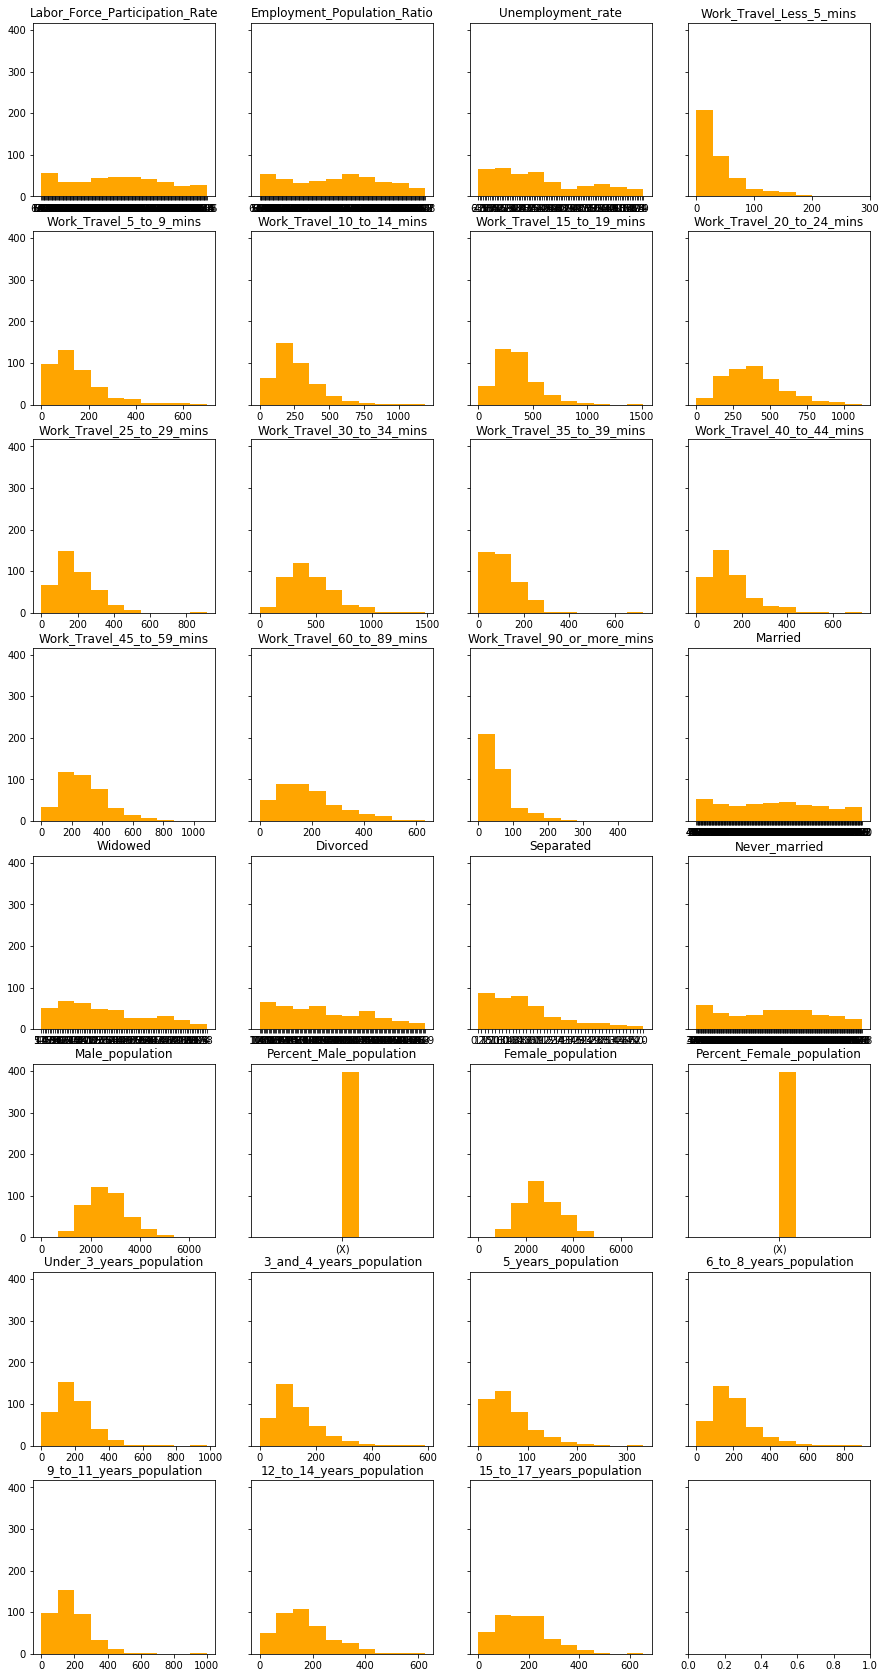

In [38]:
def hist_plots(df, i, j):
    column_list = [df.columns[x:x+j] for x in range(0, len(df.columns), j)]
    fig, axes = plt.subplots(i, j, figsize=(15, 30),
                             sharey=True,
                             tight_layout=False)
    for n in range(i):
        for m in range(j):
            column = column_list[n][m]
            df1 = df[column].dropna()
            axes[n, m].hist(df1, color='orange')
            axes[n, m].set_title(column)
            axes[n, m].set_xlabel('')
            axes[n, m].set_ylabel('')

hist_plots(king_csv_df_new, 8, 4) 

In [39]:
king_csv_df_new.drop(columns=['Percent_Male_population', 'Percent_Female_population'], inplace=True)
king_csv_df_new.head()

,Labor_Force_Participation_Rate,Employment_Population_Ratio,Unemployment_rate,Work_Travel_Less_5_mins,Work_Travel_5_to_9_mins,Work_Travel_10_to_14_mins,Work_Travel_15_to_19_mins,Work_Travel_20_to_24_mins,Work_Travel_25_to_29_mins,Work_Travel_30_to_34_mins,...,Never_married,Male_population,Female_population,Under_3_years_population,3_and_4_years_population,5_years_population,6_to_8_years_population,9_to_11_years_population,12_to_14_years_population,15_to_17_years_population
Tract name,,,,,,,,,,,,,,,,,,,,,
2.00,67.5,63.2,6.0,0,217,517,407,536,386,633,...,38.0,3916,4057,202,188,33,277,204,97,199
3.00,74.3,72.5,2.5,11,93,95,158,338,83,300,...,34.5,1443,1379,97,21,43,112,55,125,54
4.01,59.7,56.5,4.9,34,114,245,280,759,365,518,...,43.5,3058,3663,288,150,34,38,47,0,277
4.02,64.6,62.2,3.8,0,157,224,326,380,173,575,...,36.6,2708,2592,80,48,79,118,165,80,49
5.00,62.0,60.6,2.3,9,47,50,117,240,132,307,...,18.4,1522,1530,128,57,55,57,106,76,125


In [40]:
king_csv_df_new.to_csv('acs_wa_king_final.csv')